In [2]:
from pathlib import Path
import numpy as np
import os
path = os. getcwd() 
path

'/Users/hexuanliu/Covid-Forecast'

In [3]:
## store location_id to string mapping
filename = '/Users/hexuanliu/Downloads/Jerzak/location_ids_111_9.csv'
with open(filename) as file:
    lines = file.readlines()
    lines = [(line.rstrip()).split(",") for line in lines]

location_map = dict()
for i in range(1,len(lines)):
    temp = lines[i]
    
    location_id = int(temp[2])
    if ((location_id >=523 and location_id <=573) or (location_id==102)):
        location_map[location_id] = temp[13]
        
print(location_map)

{102: 'United States of America', 523: 'Alabama', 524: 'Alaska', 525: 'Arizona', 526: 'Arkansas', 527: 'California', 528: 'Colorado', 529: 'Connecticut', 530: 'Delaware', 531: 'District of Columbia', 532: 'Florida', 533: 'Georgia', 534: 'Hawaii', 535: 'Idaho', 536: 'Illinois', 537: 'Indiana', 538: 'Iowa', 539: 'Kansas', 540: 'Kentucky', 541: 'Louisiana', 542: 'Maine', 543: 'Maryland', 544: 'Massachusetts', 545: 'Michigan', 546: 'Minnesota', 547: 'Mississippi', 548: 'Missouri', 549: 'Montana', 550: 'Nebraska', 551: 'Nevada', 552: 'New Hampshire', 553: 'New Jersey', 554: 'New Mexico', 555: 'New York', 556: 'North Carolina', 557: 'North Dakota', 558: 'Ohio', 559: 'Oklahoma', 560: 'Oregon', 561: 'Pennsylvania', 562: 'Rhode Island', 563: 'South Carolina', 564: 'South Dakota', 565: 'Tennessee', 566: 'Texas', 567: 'Utah', 568: 'Vermont', 569: 'Virginia', 570: 'Washington', 571: 'West Virginia', 572: 'Wisconsin', 573: 'Wyoming'}


In [12]:
## location str to id reverse map
filename = '/Users/hexuanliu/Downloads/Jerzak/location_ids_111_9.csv'
with open(filename) as file:
    lines = file.readlines()
    lines = [(line.rstrip()).split(",") for line in lines]

reverse_location_map = dict()
for i in range(1,len(lines)):
    temp = lines[i]
    
    location_id = int(temp[2])
    location = temp[13]
    if ((location_id >=523 and location_id <=573) or (location_id==102)):
        reverse_location_map[location] = location_id
        
print(reverse_location_map)

{'United States of America': 102, 'Alabama': 523, 'Alaska': 524, 'Arizona': 525, 'Arkansas': 526, 'California': 527, 'Colorado': 528, 'Connecticut': 529, 'Delaware': 530, 'District of Columbia': 531, 'Florida': 532, 'Georgia': 533, 'Hawaii': 534, 'Idaho': 535, 'Illinois': 536, 'Indiana': 537, 'Iowa': 538, 'Kansas': 539, 'Kentucky': 540, 'Louisiana': 541, 'Maine': 542, 'Maryland': 543, 'Massachusetts': 544, 'Michigan': 545, 'Minnesota': 546, 'Mississippi': 547, 'Missouri': 548, 'Montana': 549, 'Nebraska': 550, 'Nevada': 551, 'New Hampshire': 552, 'New Jersey': 553, 'New Mexico': 554, 'New York': 555, 'North Carolina': 556, 'North Dakota': 557, 'Ohio': 558, 'Oklahoma': 559, 'Oregon': 560, 'Pennsylvania': 561, 'Rhode Island': 562, 'South Carolina': 563, 'South Dakota': 564, 'Tennessee': 565, 'Texas': 566, 'Utah': 567, 'Vermont': 568, 'Virginia': 569, 'Washington': 570, 'West Virginia': 571, 'Wisconsin': 572, 'Wyoming': 573}


In [146]:
## open the truth data file
filename = '/Users/hexuanliu/Downloads/Jerzak/ihme_truth_inc_death_wk.csv'
with open(filename) as file:
    lines = file.readlines()
    lines = [(line.rstrip()).split(",") for line in lines]

## filter location_id and map to US states strings
US_truth = []
for i in range(1,len(lines)):
    temp = lines[i]
    location_id = int(temp[0])
    if ((location_id >=523 and location_id <=573) or (location_id==102)):
        temp[0] = location_map[location_id]
        US_truth.append(temp)
        
    

In [147]:
## National truth data
filename = '/Users/hexuanliu/Downloads/Jerzak/ihme_truth_inc_death_wk.csv'
with open(filename) as file:
    lines = file.readlines()
    lines = [(line.rstrip()).split(",") for line in lines]

## filter location_id and map to US states strings
US_truth = []
for i in range(1,len(lines)):
    temp = lines[i]
    location_id = int(temp[0])
    if ((location_id==102)):
        print(temp)

['102', '0.0', '0.0', 'inc death']
['102', '1.0', '0.0', 'inc death']
['102', '2.0', '0.0', 'inc death']
['102', '3.0', '0.010875600167621', 'inc death']
['102', '4.0', '0.043081184956469995', 'inc death']
['102', '5.0', '0.039067596237399076', 'inc death']
['102', '6.0', '0.2287486820036973', 'inc death']
['102', '7.0', '0.115714516113403', 'inc death']
['102', '8.0', '3.2913443434805236', 'inc death']
['102', '9.0', '15.550968652942036', 'inc death']
['102', '10.0', '49.500817621197', 'inc death']
['102', '11.0', '378.6743911339023', 'inc death']
['102', '12.0', '2135.0708656480215', 'inc death']
['102', '13.0', '7555.100978981085', 'inc death']
['102', '14.0', '13697.796647452134', 'inc death']
['102', '15.0', '15640.914150941137', 'inc death']
['102', '16.0', '15371.557384461823', 'inc death']
['102', '17.0', '13633.608335649067', 'inc death']
['102', '18.0', '12403.254282282269', 'inc death']
['102', '19.0', '10337.27706751566', 'inc death']
['102', '20.0', '8373.519352578594', 'i

In [4]:
state_names=list(location_map.values())
print(state_names)

['United States of America', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [33]:
def extract_state_truth(state, start_week, end_week, full_list):
    ## return a map for the given state and time period
    ## state: string, date: datetime, full_list: list of all states data
    weekly_map={}
    
    for a in full_list:
        week = int(float(a[1]))
        if a[0]==state and week>=start_week and week<=end_week:
            weekly_map[a[1]]=a[2]
    return weekly_map

In [35]:
## get state truth data and write to IHME/state_true_data.txt
start_week = 10 ## 2020-03-07, target end date
end_week = 100 ## 2021-12-04
state_names = set(location_map.values())
for state in state_names:
    weekly_map = extract_state_truth(state, start_week, end_week, US_truth)
    textfile = open("/Users/hexuanliu/Covid-Forecast/IHME/%s_true_data.txt" %state, "w")
    for element in list(weekly_map.values()):
        textfile.write(str(element) + "\n")
    textfile.close()

In [423]:
filename = '/Users/hexuanliu/Downloads/Jerzak/inc_death.csv'
with open(filename) as file:
    lines = file.readlines()
    lines = [(line.rstrip()).split(",") for line in lines]

In [424]:
method_names = set()
for i in range(1,len(lines)):
    method_names.add(lines[i][0])

In [425]:
lines[0:3]

[['model_name',
  'forecast_date',
  'ensemble',
  'location_id',
  'target_end_date',
  'week_id',
  'metric',
  'time_unit',
  'value',
  'source_filepath',
  'extraction_type'],
 ['CEID-InfectionKalman',
  '2020-06-29',
  '',
  '527',
  '2020-07-04',
  '26',
  'inc death',
  'wk',
  '580.2',
  '/ihme/covid-19-2/model-comparison-inputs/snapshot-data/2022_01_21.03/manual/eamon-odea/downloaded_inc_death_wk.csv',
  'manual'],
 ['CEID-InfectionKalman',
  '2020-06-29',
  '',
  '527',
  '2020-07-11',
  '27',
  'inc death',
  'wk',
  '714.3',
  '/ihme/covid-19-2/model-comparison-inputs/snapshot-data/2022_01_21.03/manual/eamon-odea/downloaded_inc_death_wk.csv',
  'manual']]

In [186]:
temp = []
all_methods = set()
for a in lines[1:]:
    location_id = int(a[3])
    if location_id==102: #or ((location_id >=523 and location_id <=573)):
        temp.append(a)
#         if 'UChicago-CovidIL' in a[0]:
#             print(a)
        all_methods.add(a[0])

In [187]:
textfile = open("/Users/hexuanliu/Covid-Forecast/IHME/national_forecast.txt","w")
for a in temp:
    textfile.write(str(a)+'\n')
textfile.close()

In [188]:

# Simple Python program to compare dates
  
# importing datetime module
import datetime
  
# date in yyyy/mm/dd format
d1 = datetime.datetime(2018, 5, 3)
d2 = datetime.datetime(2020, 2, 2)
  
# Comparing the dates will return
# either True or False
print("d1 is greater than d2 : ", d1 > d2)
print("d1 is less than d2 : ", d1 < d2)
print("d1 is not equal to d2 : ", d1 != d2)

d1 is greater than d2 :  False
d1 is less than d2 :  True
d1 is not equal to d2 :  True


In [189]:
import datetime
def isBetweenDate(x, start_date, end_date):
    ## start and end_date are in datetime format, x is a string "year-month-date"
    temp = x.split('-')
    d = datetime.datetime(int(temp[0]), int(temp[1]), int(temp[2]))
    if d>=start_date and d<=end_date:
        return True
    return False

isBetweenDate('2020-02-03', d1, d2)

False

In [250]:
## store national forecasts at a start_date in a map: key=method, value=list of forecasts
methods = set()
start_date = datetime.datetime(2021, 5, 20)
end_date = datetime.datetime(2021, 5, 27)

national_forecasts = {}

for a in temp:
    
    if isBetweenDate(a[1], start_date, end_date):
        print(a)
        if a[0] not in national_forecasts.keys():
            national_forecasts[a[0]]=[]
        national_forecasts[a[0]].append(float(a[8]))
        
        methods.add(a[0])

        

['UCM_MESALab-FoGSEIR', '2021-05-23', 'cdc', '102', '2021-05-29', '73', 'inc death', 'wk', '3802.0', '/ihme/covid-19-2/model-comparison-inputs/snapshot-data/2022_01_21.03/automated/cdc_ensemble/UCM_MESALab-FoGSEIR/cdc_inc death_wk.csv', 'auto']
['UCM_MESALab-FoGSEIR', '2021-05-23', 'cdc', '102', '2021-06-05', '74', 'inc death', 'wk', '3699.0', '/ihme/covid-19-2/model-comparison-inputs/snapshot-data/2022_01_21.03/automated/cdc_ensemble/UCM_MESALab-FoGSEIR/cdc_inc death_wk.csv', 'auto']
['UCM_MESALab-FoGSEIR', '2021-05-23', 'cdc', '102', '2021-06-12', '75', 'inc death', 'wk', '3598.0', '/ihme/covid-19-2/model-comparison-inputs/snapshot-data/2022_01_21.03/automated/cdc_ensemble/UCM_MESALab-FoGSEIR/cdc_inc death_wk.csv', 'auto']
['UCM_MESALab-FoGSEIR', '2021-05-23', 'cdc', '102', '2021-06-19', '76', 'inc death', 'wk', '3500.0', '/ihme/covid-19-2/model-comparison-inputs/snapshot-data/2022_01_21.03/automated/cdc_ensemble/UCM_MESALab-FoGSEIR/cdc_inc death_wk.csv', 'auto']
['UCM_MESALab-FoGSEI

In [251]:
len(methods)

26

In [252]:
methods

{'AIpert-pwllnod',
 'CEID-Walk',
 'CovidAnalytics-DELPHI',
 'DDS-NBDS',
 'Geneva-DetGrowth',
 'IEM_MED-CovidProject',
 'JHU_CSSE-DECOM',
 'KITmetricslab-select_ensemble',
 'LNQ-ens1',
 'MIT-Cassandra',
 'MIT_CritData-GBCF',
 'MIT_ISOLAT-Mixtures',
 'Microsoft-DeepSTIA',
 'OliverWyman-Navigator',
 'PSI-DRAFT',
 'RobertWalraven-ESG',
 'SteveMcConnell-CovidComplete',
 'TTU-squider',
 'UA-EpiCovDA',
 'UCM_MESALab-FoGSEIR',
 'UCSD_NEU-DeepGLEAM',
 'UChicagoCHATTOPADHYAY-UnIT',
 'UMass-MechBayes',
 'UMich-RidgeTfReg',
 'UpstateSU-GRU',
 'epiforecasts-ensemble1'}

In [253]:
national_forecasts

{'UCM_MESALab-FoGSEIR': [3802.0, 3699.0, 3598.0, 3500.0, 3403.0],
 'UCSD_NEU-DeepGLEAM': [2756.961561214906,
  2395.5601198974027,
  2073.374517895195,
  1782.113247602194],
 'TTU-squider': [3838.768, 3569.074, 3308.385, 3054.083],
 'AIpert-pwllnod': [3704.85765809637,
  3539.9190073406426,
  3400.2380685045405,
  3283.8440592767533,
  3188.5981755041366,
  3111.98159860782,
  3050.859829944712,
  3001.255170242175],
 'MIT_ISOLAT-Mixtures': [3228.262310519413,
  2706.629148769573,
  2202.9510960149246,
  1739.0237004905866],
 'MIT-Cassandra': [3894.166666666666,
  3962.3141257326256,
  4385.357138351618,
  4403.295555800589,
  4839.710261930255],
 'IEM_MED-CovidProject': [3608.430879212007,
  3492.7534147377155,
  3431.435522500644,
  3461.620913631156],
 'MIT_CritData-GBCF': [3424.0, 3173.0, 2989.0, 2943.0],
 'UpstateSU-GRU': [4938.894, 4801.4053, 4616.3252, 4573.895],
 'OliverWyman-Navigator': [3466.321312026913,
  3337.817948593821,
  2962.3964577045504,
  2630.528533224037],
 'KITm

In [254]:
list1=[]
for key, value in national_forecasts.items():
    if len(value)>=6:
        list1.append(key)
print(list1)

['AIpert-pwllnod', 'PSI-DRAFT', 'CovidAnalytics-DELPHI']


In [274]:
## process state data from temp to national_forecast_startDate.
## include ~16 methods, all are cut to 4-week out
result = ''
methods = set()
i = 0
for start in ['09-06','09-13','09-20','09-27','10-04','10-11','10-18','10-25','11-01','11-08','11-15','11-22','11-29','12-06','12-13','12-20','12-27']:
    start_date = '2021-'+start
    textfile = open("/Users/hexuanliu/Covid-Forecast/IHME/national_forecast_%s.txt" %start_date, "w")
    for a in temp:
        target_date=[88+i,89+i,90+i,91+i]
        
        if a[1]==start_date and (int(a[5]) in target_date):
            result=result+a[0]+' '+a[1]+' '+a[4]+' '+a[8]+'\n'
            print(a)
            methods.add(a[0])
    textfile.write(result)
    textfile.close()
    i = i+1
    result=''


['UCSD_NEU-DeepGLEAM', '2021-09-06', 'cdc', '102', '2021-09-11', '88', 'inc death', 'wk', '10081.764618658091', '/ihme/covid-19-2/model-comparison-inputs/snapshot-data/2022_01_21.03/automated/cdc_ensemble/UCSD_NEU-DeepGLEAM/cdc_inc death_wk.csv', 'auto']
['UCSD_NEU-DeepGLEAM', '2021-09-06', 'cdc', '102', '2021-09-18', '89', 'inc death', 'wk', '10591.150693100435', '/ihme/covid-19-2/model-comparison-inputs/snapshot-data/2022_01_21.03/automated/cdc_ensemble/UCSD_NEU-DeepGLEAM/cdc_inc death_wk.csv', 'auto']
['UCSD_NEU-DeepGLEAM', '2021-09-06', 'cdc', '102', '2021-09-25', '90', 'inc death', 'wk', '10988.34453403834', '/ihme/covid-19-2/model-comparison-inputs/snapshot-data/2022_01_21.03/automated/cdc_ensemble/UCSD_NEU-DeepGLEAM/cdc_inc death_wk.csv', 'auto']
['UCSD_NEU-DeepGLEAM', '2021-09-06', 'cdc', '102', '2021-10-02', '91', 'inc death', 'wk', '11211.089540330222', '/ihme/covid-19-2/model-comparison-inputs/snapshot-data/2022_01_21.03/automated/cdc_ensemble/UCSD_NEU-DeepGLEAM/cdc_inc deat

In [332]:
print(methods)

{'UCSD_NEU-DeepGLEAM', 'AIpert-pwllnod', 'Microsoft-DeepSTIA', 'epiforecasts-ensemble1', 'DDS-NBDS', 'SteveMcConnell-CovidComplete', 'CovidAnalytics-DELPHI', 'MIT-Cassandra', 'MIT_ISOLAT-Mixtures', 'RobertWalraven-ESG', 'UMich-RidgeTfReg', 'IEM_MED-CovidProject', 'KITmetricslab-select_ensemble', 'CEID-Walk', 'PSI-DRAFT'}


In [151]:
filename = '/Users/hexuanliu/Downloads/Jerzak/day_to_week_mapping.csv'
date_id_map = {}
with open(filename) as file:
    lines = file.readlines()
    lines = [(line.rstrip()).split(",") for line in lines]

for a in lines[1:]:
    date_id_map[a[3]]=int(a[4])
date_id_map

{'2020-01-04': 0,
 '2020-01-11': 1,
 '2020-01-18': 2,
 '2020-01-25': 3,
 '2020-02-01': 4,
 '2020-02-08': 5,
 '2020-02-15': 6,
 '2020-02-22': 7,
 '2020-02-29': 8,
 '2020-03-07': 9,
 '2020-03-14': 10,
 '2020-03-21': 11,
 '2020-03-28': 12,
 '2020-04-04': 13,
 '2020-04-11': 14,
 '2020-04-18': 15,
 '2020-04-25': 16,
 '2020-05-02': 17,
 '2020-05-09': 18,
 '2020-05-16': 19,
 '2020-05-23': 20,
 '2020-05-30': 21,
 '2020-06-06': 22,
 '2020-06-13': 23,
 '2020-06-20': 24,
 '2020-06-27': 25,
 '2020-07-04': 26,
 '2020-07-11': 27,
 '2020-07-18': 28,
 '2020-07-25': 29,
 '2020-08-01': 30,
 '2020-08-08': 31,
 '2020-08-15': 32,
 '2020-08-22': 33,
 '2020-08-29': 34,
 '2020-09-05': 35,
 '2020-09-12': 36,
 '2020-09-19': 37,
 '2020-09-26': 38,
 '2020-10-03': 39,
 '2020-10-10': 40,
 '2020-10-17': 41,
 '2020-10-24': 42,
 '2020-10-31': 43,
 '2020-11-07': 44,
 '2020-11-14': 45,
 '2020-11-21': 46,
 '2020-11-28': 47,
 '2020-12-05': 48,
 '2020-12-12': 49,
 '2020-12-19': 50,
 '2020-12-26': 51,
 '2021-01-02': 52,
 '2

In [325]:
## write forecasts in state_forecast_date.txt
for tempDate in ["05-24", "06-07", "06-14", "06-21", "06-28", "07-05", "07-12", "07-19", "07-26", "08-02", "08-09","08-16","08-23","08-30","09-06","09-13","09-20","09-27","10-04","10-11"]:
    result = ''
    methods = set()
    start_date = '2021-'+tempDate
    j = 0

    textfile = open("/Users/hexuanliu/Covid-Forecast/IHME/state_forecast_%s.txt" %start_date, "w")
    for a in temp:
    
        if a[1]==start_date:
            if j==0:
                target_date = int(a[5])
                target_date_set = [target_date, target_date+1, target_date+2, target_date+3]
            
            if int(a[5]) in target_date_set:
                result=result+a[0]+' '+a[1]+' '+a[4]+' '+a[8]+' '+a[3]+'\n'
                #print(a)
                j = j+1
                methods.add(a[0])
        
    
    textfile.write(result)
    textfile.close()

In [328]:
len(methods)

15

In [111]:
methods={'CEID-Walk', 'IEM_MED-CovidProject','MIT-Cassandra','Microsoft-DeepSTIA','RobertWalraven-ESG','SteveMcConnell-CovidComplete'}

In [327]:
methods = {'UCSD_NEU-DeepGLEAM', 'PSI-DRAFT', 'AIpert-pwllnod', 'epiforecasts-ensemble1', 'Microsoft-DeepSTIA', 'DDS-NBDS', 'SteveMcConnell-CovidComplete', 'CovidAnalytics-DELPHI','MIT_ISOLAT-Mixtures', 'RobertWalraven-ESG', 'UMich-RidgeTfReg', 'IEM_MED-CovidProject', 'KITmetricslab-select_ensemble', 'CEID-Walk', 'MIT-Cassandra'}

In [417]:
methods ={'AIpert-pwllnod', 'PSI-DRAFT', 'CovidAnalytics-DELPHI'}

In [419]:
## extract national forecasts and store in separate date files
for tempDate in ["05-24", "06-07", "06-14", "06-21", "06-28", "07-05", "07-12", "07-19", "07-26", "08-02", "08-09","08-16","08-23","08-30","09-06","09-13","09-20","09-27","10-04","10-11"]:
    filename = "/Users/hexuanliu/Covid-Forecast/IHME/national_forecast_2021-%s.txt" %tempDate
    with open(filename) as file:
        lines = file.readlines()
        lines = [(line.rstrip()).split(" ") for line in lines]
    #print(lines)
    forec_list = []
    j = 0
    tmp = []
    for a in lines:
        if (a[0] in methods):
            if j==0:
                print(a[0])
            tmp.append(float(a[3]))
            j = j+1
            if j==4:
                forec_list.append(tmp)
                j = 0
                tmp = []
    if (len(forec_list)<3):
        print(tempDate)


    textfile = open("/Users/hexuanliu/Covid-Forecast/IHME/forecast_list_%s.txt" %tempDate, "w")
    for element in forec_list:
        templine =  str(element).replace('[','').replace(']','')
#         print(templine)
        textfile.write(templine + "\n")
    textfile.close()

AIpert-pwllnod
PSI-DRAFT
CovidAnalytics-DELPHI
AIpert-pwllnod
PSI-DRAFT
CovidAnalytics-DELPHI
AIpert-pwllnod
PSI-DRAFT
CovidAnalytics-DELPHI
AIpert-pwllnod
PSI-DRAFT
CovidAnalytics-DELPHI
AIpert-pwllnod
PSI-DRAFT
CovidAnalytics-DELPHI
AIpert-pwllnod
PSI-DRAFT
CovidAnalytics-DELPHI
AIpert-pwllnod
PSI-DRAFT
CovidAnalytics-DELPHI
AIpert-pwllnod
PSI-DRAFT
CovidAnalytics-DELPHI
AIpert-pwllnod
PSI-DRAFT
07-26
AIpert-pwllnod
PSI-DRAFT
CovidAnalytics-DELPHI
AIpert-pwllnod
PSI-DRAFT
CovidAnalytics-DELPHI
PSI-DRAFT
CovidAnalytics-DELPHI
08-16
AIpert-pwllnod
PSI-DRAFT
CovidAnalytics-DELPHI
AIpert-pwllnod
PSI-DRAFT
CovidAnalytics-DELPHI
PSI-DRAFT
CovidAnalytics-DELPHI
09-06
AIpert-pwllnod
PSI-DRAFT
CovidAnalytics-DELPHI
AIpert-pwllnod
PSI-DRAFT
CovidAnalytics-DELPHI
AIpert-pwllnod
PSI-DRAFT
CovidAnalytics-DELPHI
AIpert-pwllnod
PSI-DRAFT
CovidAnalytics-DELPHI
PSI-DRAFT
CovidAnalytics-DELPHI
10-11


In [109]:
## extract state forecasts and store in state-date files
methods = set()
for tempDate in ["05-24", "06-07", "06-14", "06-21", "06-28", "07-05", "07-12", "07-19", "07-26", "08-02", "08-09","08-16","08-23","08-30"]:
    filename = "/Users/hexuanliu/Covid-Forecast/IHME/state_forecast_2021-%s.txt" %tempDate
    with open(filename) as file:
        lines = file.readlines()
        lines = [(line.rstrip()).split(" ") for line in lines]
    for state in state_names:
        forec_list = []
        j = 0
        tmp = []
        for a in lines:
            if (a[0] in methods and location_map[int(a[4])]==state):
                #if j==0:
                    #print(a[0])
                tmp.append(float(a[3]))
                j = j+1
                if j==4:
                    forec_list.append(tmp)
                    j = 0
                    tmp = []
        if (len(forec_list)==6):
            print(state, tempDate)

In [288]:
state_names.remove('Alaska')
state_names.remove('District of Columbia')
state_names.remove('Hawaii')

In [295]:
## extract state forecasts and store in state-date files
for tempDate in ["05-24", "06-07", "06-14", "06-21", "06-28", "07-05", "07-12", "07-19", "07-26", "08-02", "08-09","08-16","08-23","08-30","09-06","09-13","09-20","09-27","10-04","10-11"]:
    filename = "/Users/hexuanliu/Covid-Forecast/IHME/state_forecast_2021-%s.txt" %tempDate
    with open(filename) as file:
        lines = file.readlines()
        lines = [(line.rstrip()).split(" ") for line in lines]
    for state in ["New York"]:
        forec_list = []
        j = 0
        tmp = []
        for a in lines:
            if (a[0] in methods and location_map[int(a[4])]==state):
                if j==0:
                    print(a[0])
                tmp.append(float(a[3]))
                j = j+1
                if j==4:
                    forec_list.append(tmp)
                    j = 0
                    tmp = []
        if (len(forec_list)<15):
            print(state, tempDate)


        textfile = open("/Users/hexuanliu/Covid-Forecast/IHME/%s_forecast_list_%s.txt" %(state, tempDate), "w")
        for element in forec_list:
            temp =  str(element).replace('[','').replace(']','')
#         print(temp)
            textfile.write(temp + "\n")
        textfile.close()

UCSD_NEU-DeepGLEAM
AIpert-pwllnod
MIT_ISOLAT-Mixtures
MIT-Cassandra
IEM_MED-CovidProject
KITmetricslab-select_ensemble
CEID-Walk
RobertWalraven-ESG
PSI-DRAFT
UMich-RidgeTfReg
epiforecasts-ensemble1
Microsoft-DeepSTIA
CovidAnalytics-DELPHI
DDS-NBDS
SteveMcConnell-CovidComplete
UCSD_NEU-DeepGLEAM
AIpert-pwllnod
MIT_ISOLAT-Mixtures
MIT-Cassandra
IEM_MED-CovidProject
KITmetricslab-select_ensemble
CEID-Walk
RobertWalraven-ESG
PSI-DRAFT
UMich-RidgeTfReg
epiforecasts-ensemble1
Microsoft-DeepSTIA
CovidAnalytics-DELPHI
DDS-NBDS
SteveMcConnell-CovidComplete
UCSD_NEU-DeepGLEAM
AIpert-pwllnod
MIT_ISOLAT-Mixtures
MIT-Cassandra
IEM_MED-CovidProject
KITmetricslab-select_ensemble
CEID-Walk
RobertWalraven-ESG
PSI-DRAFT
UMich-RidgeTfReg
epiforecasts-ensemble1
Microsoft-DeepSTIA
CovidAnalytics-DELPHI
SteveMcConnell-CovidComplete
New York 06-14
UCSD_NEU-DeepGLEAM
AIpert-pwllnod
MIT_ISOLAT-Mixtures
MIT-Cassandra
IEM_MED-CovidProject
KITmetricslab-select_ensemble
CEID-Walk
RobertWalraven-ESG
PSI-DRAFT
UMich

In [359]:
import numpy as np
## fill in the missing method with the avg of existing methods

for tempDate in ["05-24", "06-07", "06-14", "06-21", "06-28", "07-05", "07-12", "07-19", "07-26", "08-02", "08-09","08-16","08-23","08-30","09-06","09-13","09-20","09-27","10-04","10-11"]:

    filename = "/Users/hexuanliu/Covid-Forecast/IHME/state_forecast_2021-%s.txt" %tempDate 
    with open(filename) as file:
        lines = file.readlines()
        lines = [(line.rstrip()).split(" ") for line in lines]
    #for state in ["Florida","New York","California","Washington","Texas","United States of America"]:
    for state in state_names:
        state_methods = set()
        forec_list = {}
        j = 0
        tmp = []
        for a in lines:     
            if (a[0] in methods and location_map[int(a[4])]==state):
            
                state_methods.add(a[0])
                #if j==0:
                    #print(a[0])
                tmp.append(float(a[3]))              
                j = j+1
                if j==4:
                    forec_list[a[0]]=tmp
                    
                    j = 0
                    tmp = []
                    
        #print(forec_list)
        res = []
        for a in forec_list.keys():
            res.append(forec_list[a])
        avg_methods=(np.mean(res, axis=0)).tolist()
        #print(avg_methods)

    ## methods include all available methods
    ## state_methods: methods that this particular state has

        forecast_list={} ## a new map to fill in the blank with average method
        for a in methods:
            if a not in state_methods:
                forecast_list[a]=avg_methods
            else:
                forecast_list[a]=forec_list[a]      
        
        textfile = open("/Users/hexuanliu/Covid-Forecast/IHME/%s_forecast_list_%s.txt" %(state, tempDate), "w")
        for element in forecast_list:
            temp =  str(forecast_list[element]).replace('[','').replace(']','')
#    print(temp)
            textfile.write(temp + "\n")
        textfile.close()


In [222]:
state_methods

{'CEID-Walk',
 'MIT-Cassandra',
 'Microsoft-DeepSTIA',
 'RobertWalraven-ESG',
 'SteveMcConnell-CovidComplete'}

In [77]:
forecast_list

{'AIpert-pwllnod': [33.903333333333336,
  30.97,
  27.346666666666668,
  24.213333333333335,
  21.686666666666667,
  19.546666666666667],
 'CovidAnalytics-DELPHI': [43.0, 43.0, 40.0, 37.0, 34.0, 31.0],
 'IHME': [26.71, 25.910000000000004, 24.040000000000003, 22.64, 21.06, 19.64],
 'PSI-DRAFT': [32.0, 24.0, 18.0, 13.0, 10.0, 8.0]}

In [349]:
forecast_list.keys()

dict_keys(['UCSD_NEU-DeepGLEAM', 'AIpert-pwllnod', 'Microsoft-DeepSTIA', 'epiforecasts-ensemble1', 'DDS-NBDS', 'SteveMcConnell-CovidComplete', 'CovidAnalytics-DELPHI', 'MIT-Cassandra', 'MIT_ISOLAT-Mixtures', 'RobertWalraven-ESG', 'UMich-RidgeTfReg', 'IEM_MED-CovidProject', 'KITmetricslab-select_ensemble', 'CEID-Walk', 'PSI-DRAFT'])

In [173]:
len(methods)

15

In [177]:
methods

{'AIpert-pwllnod',
 'CEID-Walk',
 'CovidAnalytics-DELPHI',
 'DDS-NBDS',
 'IEM_MED-CovidProject',
 'KITmetricslab-select_ensemble',
 'MIT-Cassandra',
 'MIT_ISOLAT-Mixtures',
 'Microsoft-DeepSTIA',
 'PSI-DRAFT',
 'RobertWalraven-ESG',
 'SteveMcConnell-CovidComplete',
 'UCSD_NEU-DeepGLEAM',
 'UMich-RidgeTfReg',
 'epiforecasts-ensemble1'}

not in the joint set: 'AIpert-pwllnod', 'UpstateSU-GRU', 'DDS-NBDS'

In [182]:
methods

{'AIpert-pwllnod',
 'CEID-Walk',
 'CovidAnalytics-DELPHI',
 'DDS-NBDS',
 'IEM_MED-CovidProject',
 'KITmetricslab-select_ensemble',
 'MIT-Cassandra',
 'MIT_ISOLAT-Mixtures',
 'Microsoft-DeepSTIA',
 'PSI-DRAFT',
 'RobertWalraven-ESG',
 'SteveMcConnell-CovidComplete',
 'UCSD_NEU-DeepGLEAM',
 'UMich-RidgeTfReg',
 'epiforecasts-ensemble1'}

In [169]:
## plot results
ihme_results = []
for i in range(1,9): 
    filename = "/Users/hexuanliu/%sUS_smape.csv" %i
    with open(filename) as file:
        lines = file.readlines()
        
        lines = [(line.rstrip()).split(",") for line in lines]
    ihme_results.extend(lines)

In [170]:
len(ihme_results)

128

In [171]:
#mase_result = np.zeros((18,4)) ## 15 methods, ##number of methods+3
mase_result = np.zeros((15,6))
for i in range(128):
    if i%16 !=0:
        #print(ihme_results[i])
        mase_result[i%16-1]=mase_result[i%16-1]+(list(map(float, ihme_results[i][1:])))

In [172]:
mase_result = mase_result/8


In [173]:
mase_result

array([[  9.60870414,  26.47008294,  43.65478182,  61.37471662,
         73.91594405,  82.89655074],
       [ 19.32812609,  27.2414604 ,  32.93729054,  37.86227356,
         40.59544222,  40.85415338],
       [ 10.60390986,  21.10856155,  24.80551601,  26.57527685,
         28.96008796,  28.35948263],
       [ 10.16561199,  18.58478168,  24.53828927,  29.83916185,
         32.80947444,  33.359147  ],
       [ 12.68502575,  35.96501161,  60.32864779,  77.74488772,
         91.34755763, 101.82456007],
       [ 13.58066056,  21.23224663,  26.28554149,  30.84079375,
         33.52141084,  35.249429  ],
       [ 21.13822531,  35.38066835,  48.65637058,  59.68319991,
         67.45466582,  74.63923724],
       [ 14.56397496,  23.0496348 ,  28.90174225,  34.01442071,
         36.86542744,  37.4393563 ],
       [ 14.56397496,  23.0496348 ,  28.90174225,  34.01442071,
         36.86542744,  37.4393563 ],
       [ 24.88815446,  32.54519982,  41.94274412,  46.96812458,
         53.80724148,  61.2

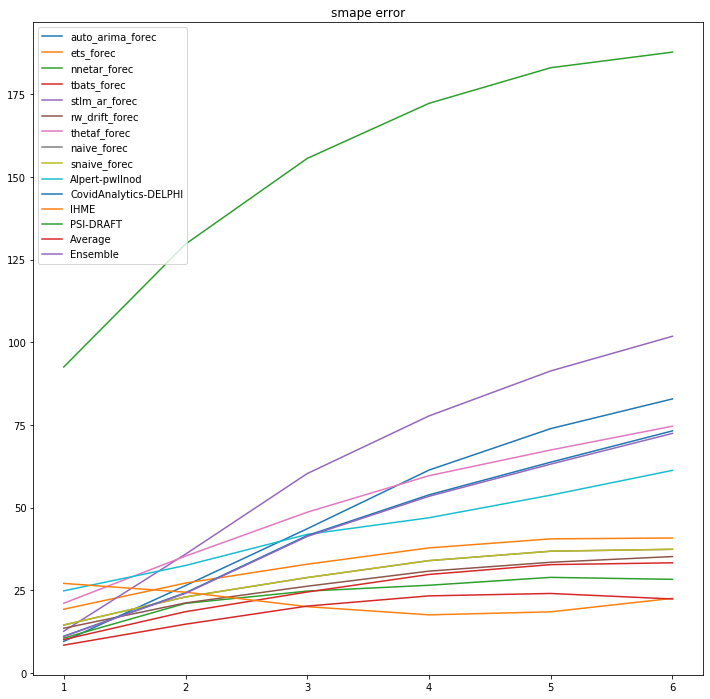

In [174]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(12,12))
#method_names = ['MIT-Cassandra','IEM_MED-CovidProject','CEID-Walk','RobertWalraven-ESG','Microsoft-DeepSTIA','SteveMcConnell-CovidComplete', 'Average','IHME','Ensemble']
#method_names = ['UCSD_NEU-DeepGLEAM', 'AIpert-pwllnod', 'Microsoft-DeepSTIA', 'epiforecasts-ensemble1', 'DDS-NBDS', 'SteveMcConnell-CovidComplete', 'CovidAnalytics-DELPHI', 'MIT-Cassandra', 'MIT_ISOLAT-Mixtures', 'RobertWalraven-ESG', 'UMich-RidgeTfReg', 'IEM_MED-CovidProject', 'KITmetricslab-select_ensemble', 'CEID-Walk', 'PSI-DRAFT','Average','IHME','Ensemble']
method_names = ['auto_arima_forec','ets_forec', 'nnetar_forec', 'tbats_forec', 'stlm_ar_forec', 'rw_drift_forec', 'thetaf_forec','naive_forec', 'snaive_forec','AIpert-pwllnod', 'CovidAnalytics-DELPHI', 'IHME', 'PSI-DRAFT','Average','Ensemble']
i = 0
for a in mase_result:
    temp_list = a
    #temp_list = list(map(float, temp_list))
    plt.plot(range(1,7),temp_list,label=method_names[i])
    i = i+1
plt.legend()
plt.title('smape error')
plt.show()
        


In [ ]:
## process ihme model data: forecast value, start date, target date
import csv
ihme = []
with open('ihme_us.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        if row[4]=='National' and row[5]=='inc death':
            ihme.append([row[6],row[3],row[7]])

In [421]:
ihme[600:-1]

[['985.8349701580642', '2021-02-25', '2021-03-27'],
 ['858.655418744732', '2021-02-25', '2021-04-03'],
 ['732.9929233849804', '2021-02-25', '2021-04-10'],
 ['613.2746743790987', '2021-02-25', '2021-04-17'],
 ['537.0098881961766', '2021-02-25', '2021-04-24'],
 ['469.41279079779326', '2021-02-25', '2021-05-01'],
 ['400.8938734132309', '2021-02-25', '2021-05-08'],
 ['334.82484224095884', '2021-02-25', '2021-05-15'],
 ['274.5265881181183', '2021-02-25', '2021-05-22'],
 ['222.13255283009312', '2021-02-25', '2021-05-29'],
 ['1647.428387179333', '2021-03-06', '2021-03-06'],
 ['1301.8556119078419', '2021-03-06', '2021-03-13'],
 ['1077.5934057994268', '2021-03-06', '2021-03-20'],
 ['883.6576093257271', '2021-03-06', '2021-03-27'],
 ['706.0135280717564', '2021-03-06', '2021-04-03'],
 ['587.8005682517642', '2021-03-06', '2021-04-10'],
 ['477.05614368085367', '2021-03-06', '2021-04-17'],
 ['398.0981138113933', '2021-03-06', '2021-04-24'],
 ['319.72476226305685', '2021-03-06', '2021-05-01'],
 ['254

In [33]:
start_date = '09-23'
end_date_list = []
result =''
for tempDate in ['10-16','10-23','10-30','11-06','11-13','11-20']:
    end_date_list.append('2021-'+tempDate)
    

textfile = open("/Users/hexuanliu/Covid-Forecast/IHME/SixWeek_IHME_forecast_%s.txt" %start_date, "w")
with open('ihme_us.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        if (row[3]=='2021-'+start_date) and (row[7] in end_date_list) and (row[4] in state_names) and (row[5]=='inc death'):
            ##ihme.append([row[6],row[3],row[7]])
            ##method, start_date, end_date, value, location_id
            #print(row[7], row[6], row[4])
            result=result+'IHME'+' '+ '2021-10-11' +' '+row[7]+' '+row[6]+' '+str(reverse_location_map[row[4]])+'\n'
textfile.write(result)
textfile.close()

In [16]:
ihme_list

[['13316.13303917467', '2021-08-26', '2021-08-28'],
 ['14863.63548436046', '2021-08-26', '2021-09-04'],
 ['15592.654524419451', '2021-08-26', '2021-09-11'],
 ['15703.94235798569', '2021-08-26', '2021-09-18'],
 ['15059.557206025971', '2021-08-26', '2021-09-25'],
 ['14503.729130824448', '2021-08-26', '2021-10-02'],
 ['13930.96094775821', '2021-08-26', '2021-10-09'],
 ['13311.63010102967', '2021-08-26', '2021-10-16'],
 ['12692.92069557694', '2021-08-26', '2021-10-23'],
 ['11781.29705139629', '2021-08-26', '2021-10-30'],
 ['10897.08996713639', '2021-08-26', '2021-11-06'],
 ['10072.92779436379', '2021-08-26', '2021-11-13'],
 ['9341.27826185277', '2021-08-26', '2021-11-20'],
 ['8728.641158947888', '2021-08-26', '2021-11-27'],
 ['15401.56188504097', '2021-09-02', '2021-09-04'],
 ['15933.973030398629', '2021-09-02', '2021-09-11'],
 ['16125.72654709288', '2021-09-02', '2021-09-18'],
 ['16018.15413858663', '2021-09-02', '2021-09-25'],
 ['15411.06612271558', '2021-09-02', '2021-10-02'],
 ['14620.

In [5]:
method_set = {'AIpert-pwllnod', 'PSI-DRAFT', 'CovidAnalytics-DELPHI'}

In [429]:
## create 6-week out SixWeek_state_forecast_date.txt files
## 4 forecasting method, each start_date has 6 end dates

for tempDate in ["05-24", "06-07", "06-14", "06-21", "06-28", "07-05", "07-12", "07-19", "07-26", "08-02", "08-09","08-16","08-23","08-30","09-06","09-13","09-20","09-27","10-04","10-11"]:
    result = ''
    #methods = set()
    start_date = '2021-'+tempDate
    target_date_set=[]
    j = 0

    textfile = open("/Users/hexuanliu/Covid-Forecast/IHME/SixWeek_state_forecast_%s.txt" %start_date, "w")
    for a in temp:
    
        if a[1]==start_date and a[0] in method_set:
            if j==0:
                target_date = int(a[5])
                target_date_set = [target_date, target_date+1, target_date+2, target_date+3,target_date+4,target_date+5]
            
            if int(a[5]) in target_date_set:
                ## format: method start_date end_date value location_id
                result=result+a[0]+' '+a[1]+' '+a[4]+' '+a[8]+' '+a[3]+'\n'
                #print(a)
                j = j+1
                methods.add(a[0])
        
    print(j, target_date_set)
    ## Concactenate with the IHME file with nearest start date
    ## must have the same target_date
    textfile.write(result)
    textfile.close()

894 [73, 74, 75, 76, 77, 78]
936 [75, 76, 77, 78, 79, 80]
936 [76, 77, 78, 79, 80, 81]
936 [77, 78, 79, 80, 81, 82]
936 [78, 79, 80, 81, 82, 83]
936 [79, 80, 81, 82, 83, 84]
826 [80, 81, 82, 83, 84, 85]
936 [81, 82, 83, 84, 85, 86]
624 [82, 83, 84, 85, 86, 87]
936 [83, 84, 85, 86, 87, 88]
936 [84, 85, 86, 87, 88, 89]
576 [85, 86, 87, 88, 89, 90]
870 [86, 87, 88, 89, 90, 91]
924 [87, 88, 89, 90, 91, 92]
600 [88, 89, 90, 91, 92, 93]
936 [89, 90, 91, 92, 93, 94]
936 [90, 91, 92, 93, 94, 95]
924 [91, 92, 93, 94, 95, 96]
936 [92, 93, 94, 95, 96, 97]
606 [93, 94, 95, 96, 97, 98]


In [41]:
import numpy as np
## fill in the missing method with the avg of existing methods

for tempDate in ["05-24", "06-07", "06-14", "06-21", "06-28", "07-05", "07-12", "07-19", "07-26", "08-02", "08-09","08-16","08-23","08-30","09-06","09-13","09-20","09-27","10-04","10-11"]:

    filename = "/Users/hexuanliu/Covid-Forecast/IHME/SixWeek_state_forecast_2021-%s.txt" %tempDate 
    with open(filename) as file:
        lines1 = file.readlines()
        lines1 = [(line.rstrip()).split(" ") for line in lines1]
    filename = "/Users/hexuanliu/Covid-Forecast/IHME/SixWeek_IHME_forecast_%s.txt" %tempDate 
    with open(filename) as file:
        lines2 = file.readlines()
        lines2 = [(line.rstrip()).split(" ") for line in lines2]

In [47]:
lines1.extend(lines2)
print(len(lines1[1]))

5


In [49]:
methods = {'AIpert-pwllnod', 'PSI-DRAFT', 'CovidAnalytics-DELPHI','IHME'}

In [66]:
import numpy as np
## fill in the missing method with the avg of existing methods

for tempDate in ["05-24", "06-07", "06-14", "06-21", "06-28", "07-05", "07-12", "07-19", "07-26", "08-02", "08-09","08-16","08-23","08-30","09-06","09-13","09-20","09-27","10-04","10-11"]:
#for tempDate in ['07-12']:
    filename = "/Users/hexuanliu/Covid-Forecast/IHME/SixWeek_state_forecast_2021-%s.txt" %tempDate 
    with open(filename) as file:
        lines = file.readlines()
        lines = [(line.rstrip()).split(" ") for line in lines]
    filename = "/Users/hexuanliu/Covid-Forecast/IHME/SixWeek_IHME_forecast_%s.txt" %tempDate 
    with open(filename) as file:
        lines2 = file.readlines()
        lines2 = [(line.rstrip()).split(" ") for line in lines2]
    lines.extend(lines2)    
    
    #for state in ["Florida","New York","California","Washington","Texas","United States of America"]:
    for state in state_names:
        state_methods = set()
        forec_list = {}
        j = 0
        tmp = []
        for a in lines:     
            if (a[0] in methods and location_map[int(a[4])]==state):
            
                #state_methods.add(a[0])
#                 if j==0:
#                     print(a)
                tmp.append(float(a[3]))              
                j = j+1
                if j==6: ##j==6
                    forec_list[a[0]]=tmp
                    state_methods.add(a[0])
                    j = 0
                    tmp = []
                    
#         print(state, tempDate,forec_list)
        res = []
        for a in forec_list.keys():
            res.append(forec_list[a])
        avg_methods=(np.mean(res, axis=0)).tolist()
        #print(avg_methods)

    ## methods include all available methods
    ## state_methods: methods that this particular state has

        forecast_list={} ## a new map to fill in the blank with average method
        for a in methods:
            if a not in state_methods:
                forecast_list[a]=avg_methods
            else:
                forecast_list[a]=forec_list[a]      
        
        textfile = open("/Users/hexuanliu/Covid-Forecast/IHME/SixWeek_%s_forecast_list_%s.txt" %(state, tempDate), "w")
        for element in forecast_list:
            temp =  str(forecast_list[element]).replace('[','').replace(']','')
#    print(temp)
            textfile.write(temp + "\n")
        textfile.close()



In [51]:
avg_methods

[1496.9660132181768,
 1396.4305368409484,
 1315.0029526572644,
 1247.4994264485165,
 1665.1075616399896,
 1774.0222553574888]

In [56]:
state_methods

{'AIpert-pwllnod', 'CovidAnalytics-DELPHI', 'IHME', 'PSI-DRAFT'}